## 4. Modeling
### 4.4 Final model 

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
import seaborn as sns
#importing the PCA scaling library
from sklearn.decomposition import PCA
#importing the feature scaling library
from sklearn.preprocessing import StandardScaler
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LogisticRegression
# Import KNN Regressor machine learning library
from sklearn.tree import DecisionTreeClassifier
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
#Import the metrics
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import svm, datasets

## Random Forest

In [2]:
# Uploading data file
loan_main_dummies = pd.read_csv('./loan_main_dummies.csv')
loan_main_dummies.head()

,loan_amnt,funded_amnt,term,installment,grade,sub_grade,emp_length,annual_inc,issue_d,dti,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,36,162.87,1,6,10,24000.0,2011,27.65,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,60,59.83,2,13,0,30000.0,2011,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,36,84.33,2,14,10,12252.0,2011,8.72,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,10000.0,36,339.31,2,10,10,49200.0,2011,20.00,...,0,0,0,0,0,1,0,0,0,0
4,3000.0,3000.0,60,67.79,1,9,1,80000.0,2011,17.94,...,0,0,0,0,0,1,0,0,0,0


In [3]:
loan_main_dummies.head()

,loan_amnt,funded_amnt,term,installment,grade,sub_grade,emp_length,annual_inc,issue_d,dti,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,36,162.87,1,6,10,24000.0,2011,27.65,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,60,59.83,2,13,0,30000.0,2011,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,36,84.33,2,14,10,12252.0,2011,8.72,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,10000.0,36,339.31,2,10,10,49200.0,2011,20.00,...,0,0,0,0,0,1,0,0,0,0
4,3000.0,3000.0,60,67.79,1,9,1,80000.0,2011,17.94,...,0,0,0,0,0,1,0,0,0,0


In [4]:
# Define dataset
X = loan_main_dummies.drop('loan_status', axis =1)
y = loan_main_dummies.loan_status

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [6]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [7]:
X_train.shape

(29774, 52)

In [8]:
X_test.shape

(12761, 52)

In [9]:
y_train.shape

(29774,)

In [10]:
y_test.shape

(12761,)

In [11]:
X_train.describe()

,loan_amnt,funded_amnt,term,installment,grade,sub_grade,emp_length,annual_inc,issue_d,dti,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
count,2.977400e+04,2.977400e+04,2.977400e+04,2.977400e+04,2.977400e+04,2.977400e+04,2.977400e+04,2.977400e+04,2.977400e+04,2.977400e+04,...,2.977400e+04,2.977400e+04,2.977400e+04,2.977400e+04,2.977400e+04,2.977400e+04,2.977400e+04,2.977400e+04,2.977400e+04,2.977400e+04
mean,-7.249860e-16,-1.301102e-16,-5.485376e-16,7.983434e-18,2.908006e-16,9.763765e-17,-3.104068e-17,1.238868e-16,1.113873e-13,6.122745e-18,...,-5.990521e-16,1.118895e-15,1.067826e-16,4.839803e-16,9.485762e-16,5.640980e-16,3.929089e-15,1.140581e-15,2.945470e-15,7.797812e-16
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.431832e+00,-1.445065e+00,-5.933057e-01,-1.467418e+00,-1.163396e+00,-1.474521e+00,-1.330257e+00,-2.372500e+00,-3.355429e+00,-1.989699e+00,...,-2.831555e-01,-9.830880e-02,-2.389354e-01,-1.346231e-01,-1.249915e-01,-3.411531e-01,-4.991575e-02,-2.197033e-01,-9.743437e-02,-1.575332e-01
25%,-7.966980e-01,-8.159841e-01,-5.933057e-01,-7.511920e-01,-4.661967e-01,-7.651754e-01,-7.757999e-01,-7.658013e-01,-2.418447e-01,-7.636866e-01,...,-2.831555e-01,-9.830880e-02,-2.389354e-01,-1.346231e-01,-1.249915e-01,-3.411531e-01,-4.991575e-02,-2.197033e-01,-9.743437e-02,-1.575332e-01
50%,-1.885911e-01,-1.781664e-01,-5.933057e-01,-2.169955e-01,-4.661967e-01,-1.976990e-01,-2.213432e-01,-3.153997e-02,7.960169e-01,1.650326e-02,...,-2.831555e-01,-9.830880e-02,-2.389354e-01,-1.346231e-01,-1.249915e-01,-3.411531e-01,-4.991575e-02,-2.197033e-01,-9.743437e-02,-1.575332e-01
75%,5.276237e-01,5.819724e-01,1.685472e+00,5.050927e-01,9.282018e-01,6.535156e-01,1.164798e+00,6.028248e-01,7.960169e-01,7.892627e-01,...,-2.831555e-01,-9.830880e-02,-2.389354e-01,-1.346231e-01,-1.249915e-01,-3.411531e-01,-4.991575e-02,-2.197033e-01,-9.743437e-02,-1.575332e-01
max,3.230321e+00,3.377885e+00,1.685472e+00,4.691065e+00,3.019800e+00,3.349029e+00,1.442027e+00,2.688601e+00,7.960169e-01,2.467042e+00,...,3.531628e+00,1.017203e+01,4.185232e+00,7.428146e+00,8.000546e+00,2.931235e+00,2.003376e+01,4.551593e+00,1.026332e+01,6.347868e+00


#### Random Forest

In [12]:
## Randomized Search 
from sklearn.model_selection import RandomizedSearchCV

In [13]:
param_rand = {'n_estimators': np.arange(100,800,100),
              'max_features' : ['auto', 'sqrt'],
              'min_samples_leaf': [1,2,4],
              'min_samples_split': [2, 5, 10],
              'max_depth' : np.arange(10,100,10),
              'max_leaf_nodes': np.arange(2,5,10),
             }

In [14]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = param_rand, n_iter = 100,
                               cv = 10, verbose=2, random_state=42, n_jobs = -1)

In [15]:
# Randomized parameter model training 
rf_random.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [16]:
# Selecting the best parameters
rf_random.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [16]:
# dla najlepszej kombinacji hyperparametrow budowa ostatecznego modelu
rf_randomized_v3 = RandomForestClassifier(n_estimators= 5,min_samples_split= 5, min_samples_leaf = 1,
                                       max_leaf_nodes= 2,max_features= 'auto',max_depth= 5)

In [17]:
# Randomized model training with the best parameters
rf_randomized_v3.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=2, min_samples_split=5,
                       n_estimators=5)

In [18]:
rf_rand_prediction_v3 = rf_randomized_v3.predict(X_test)

In [19]:
print(classification_report(y_test,rf_rand_prediction_v3))
rf_rand_pr_v3 = evaluate(rf_rand_prediction_v3,y_test, zero_division = 1)
rf_rand_pr_v3

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1886
           1       0.85      1.00      0.92     10875

    accuracy                           0.85     12761
   macro avg       0.43      0.50      0.46     12761
weighted avg       0.73      0.85      0.78     12761



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'evaluate' is not defined

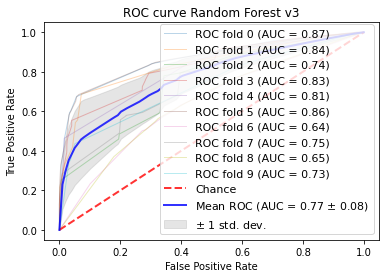

In [20]:
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = RandomForestClassifier(n_estimators= 5,min_samples_split= 5, min_samples_leaf = 1,
                                       max_leaf_nodes= 2,max_features= 'auto',max_depth= 5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X_train, y_train)
    viz = plot_roc_curve(classifier, X_test, y_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve Random Forest v3")
#ax.legend(loc="lower right")
ax.legend(loc="lower right", prop={'size': 11})
plt
plt.show()

In [22]:
rf_randomized_v2 = RandomForestClassifier(n_estimators= 700,min_samples_split= 5, min_samples_leaf = 1,
                                       max_leaf_nodes= 2,max_features= 'auto',max_depth= 70)

In [23]:
rf_randomized_v2.fit(X_train,y_train)

RandomForestClassifier(max_depth=70, max_leaf_nodes=2, min_samples_split=5,
                       n_estimators=700)

In [24]:
rf_rand_prediction_v2 = rf_randomized_v2.predict(X_test)

In [25]:
print(classification_report(y_test,rf_rand_prediction_v2))
rf_rand_pr_v2 = evaluate(rf_rand_prediction_v2,y_test, zero_division = 1)
rf_rand_pr_v2

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1886
           1       0.85      1.00      0.92     10875

    accuracy                           0.85     12761
   macro avg       0.43      0.50      0.46     12761
weighted avg       0.73      0.85      0.78     12761



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'evaluate' is not defined

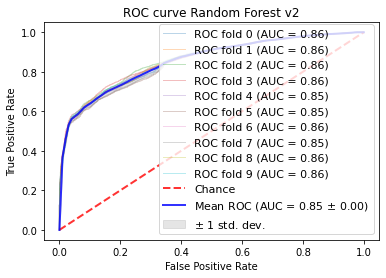

In [26]:
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = RandomForestClassifier(n_estimators= 700,min_samples_split= 5, min_samples_leaf = 1,
                                       max_leaf_nodes= 2,max_features= 'auto',max_depth= 70)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X_train, y_train)
    viz = plot_roc_curve(classifier, X_test, y_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve Random Forest v2")
#ax.legend(loc="lower right")
ax.legend(loc="lower right", prop={'size': 11})
plt
plt.show()

In [27]:
# Learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv='StratifiedKFold',
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :param train_sizes:
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.figure(figsize=(30, 20))
    return plt

In [28]:
# Shuffle for learning curves
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

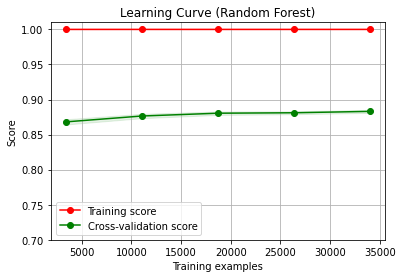

<Figure size 2160x1440 with 0 Axes>

In [29]:
# Learning curve for Random Forest
model_rb = RandomForestClassifier(random_state=0)
plot_learning_curve(model_rb, 'Learning Curve (Random Forest)', X, y, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

In [30]:
# Checking feature importance
rf_randomized_v2.feature_importances_

array([0.01      , 0.01142857, 0.07428571, 0.00142857, 0.09      ,
       0.09714286, 0.        , 0.02571429, 0.01428571, 0.01142857,
       0.        , 0.00857143, 0.04857143, 0.00142857, 0.02857143,
       0.        , 0.04      , 0.01      , 0.14571429, 0.13      ,
       0.        , 0.00857143, 0.06571429, 0.02857143, 0.05428571,
       0.04714286, 0.00142857, 0.        , 0.00285714, 0.00428571,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00428571, 0.        , 0.01142857,
       0.        , 0.        , 0.        , 0.        , 0.00142857,
       0.        , 0.        , 0.        , 0.        , 0.02      ,
       0.        , 0.00142857])

Text(0.5, 0, 'Random Forest Feature Importance')

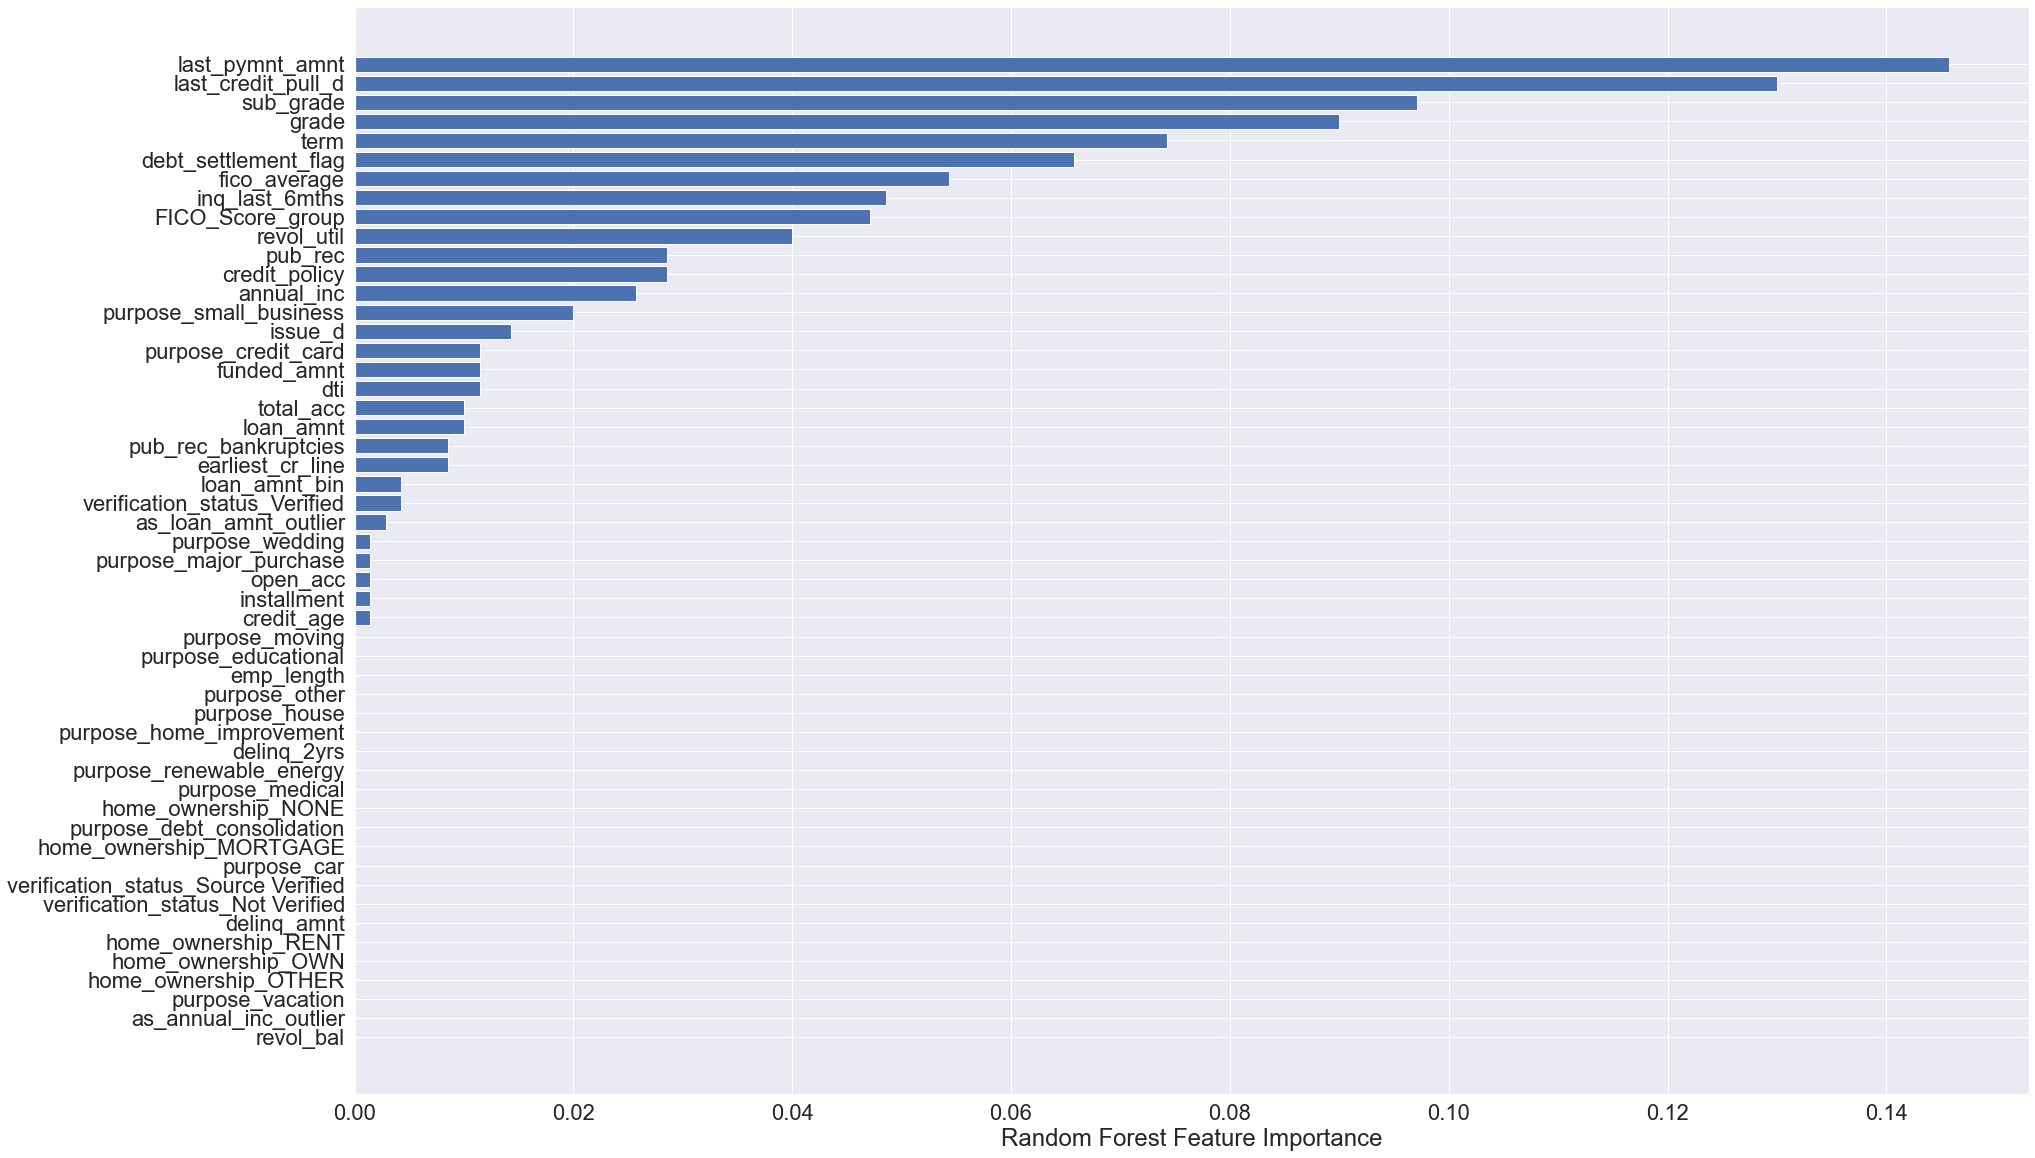

In [31]:
# Plotting feature importance
plt.figure(figsize=(30, 20))
sns.set(font_scale= 2)

sorted_idx = rf_randomized_v2.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf_randomized_v2.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

The feature importance (variable importance) described multiple relevant features. 

According to the Random Forest Importance, among the top 10 most important are: last_pymnt_amnt, last_credit_pull_d,  grade, sub_grade, term, debt_settlement_flag, FICO_Score_group, fico_average, credit_policy, inq_last_6mths.

Based the definition of the above selected features, I consider them as rationally selected.
Last payment amount (last_pymnt_amnt) describes the latest received amount of money, whereas last credit pull (last_credit_pull_d) indicates the recent monthly credit pulled for this loan. Both features are very important for the loan payment.

Grade and subgrade are defining the risk grade to each loan that may serve as a signal for lenders.

Debt settlement flag (debt_settlement_flag) indicates, whether  of not, borrower, who has charged-off, is working with a debt settlement company (i.e. company which is working on negotiation between lenders and creditors to reduce or eliminate borrower's debt). Therefore, I think that this feature is very crucial for granting the loan.

Moreover, they are 2 features related to FICO scoring (FICO_Score_group and fico_average). This features represent how credit-worthy a potential borrower is.

In [32]:
# Training model with top 10 features 

# Define dataset
X_features = loan_main_dummies[['last_pymnt_amnt', 'sub_grade', 'grade', 'last_credit_pull_d', 'term', 'debt_settlement_flag', 'fico_average', 'FICO_Score_group', 'inq_last_6mths', 'credit_policy']]
y_features = loan_main_dummies.loan_status

In [36]:
# Trying all features 
X_features2 = loan_main_dummies[['last_pymnt_amnt', 'sub_grade', 'grade', 'last_credit_pull_d', 'term', 'debt_settlement_flag', 'fico_average', 'FICO_Score_group', 'inq_last_6mths', 'credit_policy', 'pub_rec', 'annual_inc', 'purpose_small_business', 'issue_d', 'purpose_credit_card', 'funded_amnt', 'dti', 'total_acc', 'loan_amnt', 'pub_rec_bankruptcies', 'earliest_cr_line', 'loan_amnt_bin', ]]
y_features2 = loan_main_dummies.loan_status

In [39]:
X_features.shape

(42535, 10)

In [40]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_pymnt_amnt       42535 non-null  float64
 1   sub_grade             42535 non-null  int64  
 2   grade                 42535 non-null  int64  
 3   last_credit_pull_d    42535 non-null  int64  
 4   term                  42535 non-null  int64  
 5   debt_settlement_flag  42535 non-null  int64  
 6   fico_average          42535 non-null  float64
 7   FICO_Score_group      42535 non-null  int64  
 8   inq_last_6mths        42535 non-null  float64
 9   credit_policy         42535 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 3.2 MB


In [41]:
X_features_train, X_features_test, y_features_train, y_features_test = train_test_split(X_features,y_features, test_size = 0.3, random_state = 1)

In [37]:
X_features2_train, X_features2_test, y_features2_train, y_features2_test = train_test_split(X_features2,y_features2, test_size = 0.3, random_state = 1)

In [42]:
# Scaling
scaler = StandardScaler()
X_features_train = scaler.fit_transform(X_features_train)
X_features_test = scaler.transform(X_features_test)
X_features_train = pd.DataFrame(X_features_train, columns= X_features.columns)
X_features_test = pd.DataFrame(X_features_test, columns = X_features.columns)

In [38]:
# Scaling
scaler = StandardScaler()
X_features2_train = scaler.fit_transform(X_features2_train)
X_features2_test = scaler.transform(X_features2_test)
X_features2_train = pd.DataFrame(X_features2_train, columns= X_features2.columns)
X_features2_test = pd.DataFrame(X_features2_test, columns = X_features2.columns)

In [43]:
X_features_train.shape, X_features_test.shape

((29774, 10), (12761, 10))

In [44]:
y_features_train.shape, y_features_test.shape

((29774,), (12761,))

In [45]:
# Model with best parameters
rf_features_randomized_v2 = RandomForestClassifier(n_estimators= 700,min_samples_split= 5, min_samples_leaf = 1,
                                       max_leaf_nodes= 2,max_features= 'auto',max_depth= 70)

In [39]:
# Model with best parameters
rf_features2_randomized_v2 = RandomForestClassifier(n_estimators= 700,min_samples_split= 5, min_samples_leaf = 1,
                                       max_leaf_nodes= 2,max_features= 'auto',max_depth= 70)

In [46]:
# Randomized model training with the best parameters
rf_features_randomized_v2.fit(X_features_train,y_features_train)

RandomForestClassifier(max_depth=70, max_leaf_nodes=2, min_samples_split=5,
                       n_estimators=700)

In [40]:
# Randomized model training with the best parameters
rf_features2_randomized_v2.fit(X_features2_train,y_features2_train)

RandomForestClassifier(max_depth=70, max_leaf_nodes=2, min_samples_split=5,
                       n_estimators=700)

In [47]:
rf_rand_features_prediction_v2 = rf_features_randomized_v2.predict(X_features_test)

In [42]:
rf_rand_features2_prediction_v2 = rf_features2_randomized_v2.predict(X_features2_test)

In [44]:
rf_rand_features2_prediction_v2 = rf_features2_randomized_v2.predict(X_features2_test)

In [49]:
print(classification_report(y_features_test,rf_rand_features_prediction_v2))
rf_rand_pr_features_v2 = evaluate(rf_rand_features_prediction_v2,y_features_test, zero_division =1)
rf_rand_pr_features_v2

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1886
           1       0.85      1.00      0.92     10875

    accuracy                           0.85     12761
   macro avg       0.43      0.50      0.46     12761
weighted avg       0.73      0.85      0.78     12761



NameError: name 'evaluate' is not defined

In [45]:
print(classification_report(y_features2_test,rf_rand_features2_prediction_v2))
rf_rand_pr_features2_v2 = evaluate(rf_rand_features2_prediction_v2,y_features2_test, zero_division =1)
rf_rand_pr_features2_v2

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1886
           1       0.85      1.00      0.92     10875

    accuracy                           0.85     12761
   macro avg       0.43      0.50      0.46     12761
weighted avg       0.73      0.85      0.78     12761



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'evaluate' is not defined

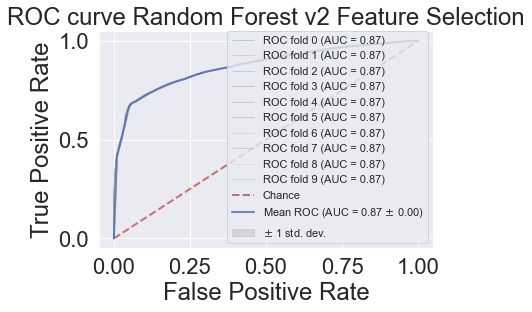

In [50]:
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = RandomForestClassifier(max_depth=70, max_leaf_nodes=2, min_samples_split=5,
                       n_estimators=700)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X_features, y_features)):
    classifier.fit(X_features_train, y_features_train)
    viz = plot_roc_curve(classifier, X_features_test, y_features_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve Random Forest v2 Feature Selection")
#ax.legend(loc="lower right")
ax.legend(loc="lower right", prop={'size': 11})
plt
plt.show()

- Random Forest Model v2 with Feature Selection has slightly higher ROC curve (AUROC = 0.87) than Random Forest Model v2 (AUROC = 0.85).
- Random Forest Feature Selection improved model performance.

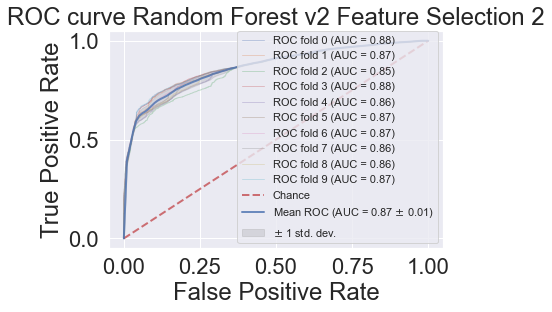

In [46]:
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = RandomForestClassifier(max_depth=70, max_leaf_nodes=2, min_samples_split=5,
                       n_estimators=700)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X_features2, y_features2)):
    classifier.fit(X_features2_train, y_features2_train)
    viz = plot_roc_curve(classifier, X_features2_test, y_features2_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve Random Forest v2 Feature Selection 2")
#ax.legend(loc="lower right")
ax.legend(loc="lower right", prop={'size': 11})
plt
plt.show()

In [47]:
# Shuffle for learning curves
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

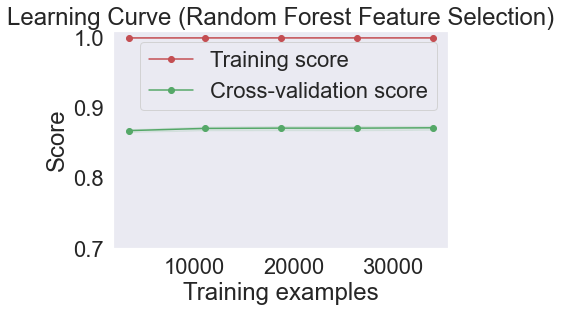

<Figure size 2160x1440 with 0 Axes>

In [52]:
model_rb = RandomForestClassifier(random_state=0)
plot_learning_curve(model_rb, 'Learning Curve (Random Forest Feature Selection)', X_features, y_features, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

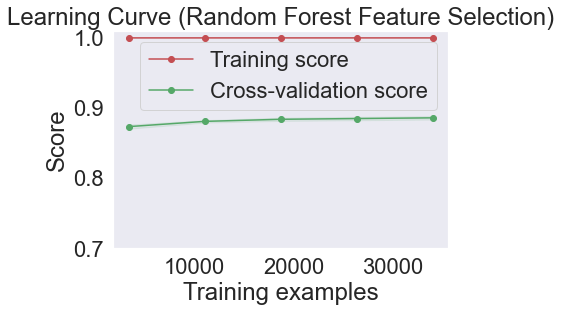

<Figure size 2160x1440 with 0 Axes>

In [48]:
model_rb = RandomForestClassifier(random_state=0)
plot_learning_curve(model_rb, 'Learning Curve (Random Forest Feature Selection)', X_features2, y_features2, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

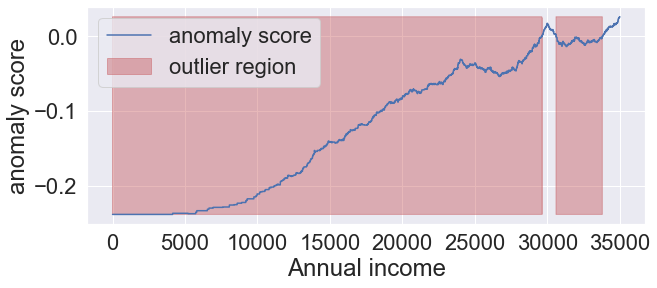

In [52]:
# Isolation forest to detect outliers
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(loan_main_dummies['annual_inc'].values.reshape(-1, 1))
xx = np.linspace(loan_main_dummies['annual_inc'].min(), loan_main_dummies['funded_amnt'].max(), len(loan_main_dummies)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Annual income')
plt.show();

- Annual income which exceeds 35k USD would be consideres as an outlier

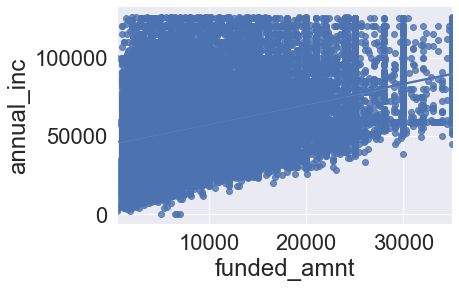

In [53]:
sns.regplot(x='funded_amnt', y='annual_inc', data=loan_main_dummies)
sns.despine();

- Some of the data points are obvious outliers such as extreme low and extreme high values.

In [54]:
df = loan_main_dummies

In [57]:
from __future__ import division
from __future__ import print_function

import warnings
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.utils.validation import check_is_fitted
from sklearn.utils.validation import check_array
from sklearn.utils.estimator_checks import check_estimator

from .base import BaseDetector
from ..utils.utility import check_parameter
from ..utils.stat_models import pairwise_distances_no_broadcast

ImportError: attempted relative import with no known parent package

In [59]:
# Cluster-based Local Outlier Factor (CBLOF)
from sklearn.neighbors import LocalOutlierFactor
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=0)
clf.fit(X)
scores_pred = clf.decision_function(X) * -1
y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)

plt.figure(figsize=(8, 8))

df1 = df
df1['outlier'] = y_pred.tolist()
    
# sales - inlier feature 1,  profit - inlier feature 2
inliers_sales = np.array(df1['funded_amnt'][df1['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(df1['annual_inc'][df1['outlier'] == 0]).reshape(-1,1)
    
# sales - outlier feature 1, profit - outlier feature 2
outliers_sales = df1['funded_amnt'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_profit = df1['annual_inc'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS:',n_outliers,'INLIERS:',n_inliers)
threshold = percentile(scores_pred, 100 * outliers_fraction)        
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
plt.axis('tight')   
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('Cluster-based Local Outlier Factor (CBLOF)')
plt.show();



NameError: name 'CBLOF' is not defined

In [60]:
# -*- coding: utf-8 -*-
"""Clustering Based Local Outlier Factor (CBLOF)
"""
# Author: Yue Zhao <zhaoy@cmu.edu>
#         Shangwen Huang <https://github.com/shangwen777>
# License: BSD 2 clause

from __future__ import division
from __future__ import print_function

import warnings
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.utils.validation import check_is_fitted
from sklearn.utils.validation import check_array
from sklearn.utils.estimator_checks import check_estimator

from .base import BaseDetector
from ..utils.utility import check_parameter
from ..utils.stat_models import pairwise_distances_no_broadcast

__all__ = ['CBLOF']


class CBLOF(BaseDetector):
    r"""The CBLOF operator calculates the outlier score based on cluster-based
    local outlier factor.
    CBLOF takes as an input the data set and the cluster model that was
    generated by a clustering algorithm. It classifies the clusters into small
    clusters and large clusters using the parameters alpha and beta.
    The anomaly score is then calculated based on the size of the cluster the
    point belongs to as well as the distance to the nearest large cluster.
    Use weighting for outlier factor based on the sizes of the clusters as
    proposed in the original publication. Since this might lead to unexpected
    behavior (outliers close to small clusters are not found), it is disabled
    by default.Outliers scores are solely computed based on their distance to
    the closest large cluster center.
    By default, kMeans is used for clustering algorithm instead of
    Squeezer algorithm mentioned in the original paper for multiple reasons.
    See :cite:`he2003discovering` for details.
    Parameters
    ----------
    n_clusters : int, optional (default=8)
        The number of clusters to form as well as the number of
        centroids to generate.
    contamination : float in (0., 0.5), optional (default=0.1)
        The amount of contamination of the data set,
        i.e. the proportion of outliers in the data set. Used when fitting to
        define the threshold on the decision function.
    clustering_estimator : Estimator, optional (default=None)
        The base clustering algorithm for performing data clustering.
        A valid clustering algorithm should be passed in. The estimator should
        have standard sklearn APIs, fit() and predict(). The estimator should
        have attributes ``labels_`` and ``cluster_centers_``.
        If ``cluster_centers_`` is not in the attributes once the model is fit,
        it is calculated as the mean of the samples in a cluster.
        If not set, CBLOF uses KMeans for scalability. See
        https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    alpha : float in (0.5, 1), optional (default=0.9)
        Coefficient for deciding small and large clusters. The ratio
        of the number of samples in large clusters to the number of samples in
        small clusters.
    beta : int or float in (1,), optional (default=5).
        Coefficient for deciding small and large clusters. For a list
        sorted clusters by size `|C1|, \|C2|, ..., |Cn|, beta = |Ck|/|Ck-1|`
    use_weights : bool, optional (default=False)
        If set to True, the size of clusters are used as weights in
        outlier score calculation.
    check_estimator : bool, optional (default=False)
        If set to True, check whether the base estimator is consistent with
        sklearn standard.
        .. warning::
            check_estimator may throw errors with scikit-learn 0.20 above.
    random_state : int, RandomState or None, optional (default=None)
        If int, random_state is the seed used by the random
        number generator; If RandomState instance, random_state is the random
        number generator; If None, the random number generator is the
        RandomState instance used by `np.random`.
    n_jobs : integer, optional (default=1)
        The number of jobs to run in parallel for both `fit` and `predict`.
        If -1, then the number of jobs is set to the number of cores.
    Attributes
    ----------
    clustering_estimator_ : Estimator, sklearn instance
        Base estimator for clustering.
    cluster_labels_ : list of shape (n_samples,)
        Cluster assignment for the training samples.
    n_clusters_ : int
        Actual number of clusters (possibly different from n_clusters).
    cluster_sizes_ : list of shape (n_clusters_,)
        The size of each cluster once fitted with the training data.
    decision_scores_ : numpy array of shape (n_samples,)
        The outlier scores of the training data.
        The higher, the more abnormal. Outliers tend to have higher scores.
        This value is available once the detector is fitted.
    cluster_centers_ : numpy array of shape (n_clusters_, n_features)
        The center of each cluster.
    small_cluster_labels_ : list of clusters numbers
        The cluster assignments belonging to small clusters.
    large_cluster_labels_ : list of clusters numbers
        The cluster assignments belonging to large clusters.
    threshold_ : float
        The threshold is based on ``contamination``. It is the
        ``n_samples * contamination`` most abnormal samples in
        ``decision_scores_``. The threshold is calculated for generating
        binary outlier labels.
    labels_ : int, either 0 or 1
        The binary labels of the training data. 0 stands for inliers
        and 1 for outliers/anomalies. It is generated by applying
        ``threshold_`` on ``decision_scores_``.
    """

    def __init__(self, n_clusters=8, contamination=0.1,
                 clustering_estimator=None, alpha=0.9, beta=5,
                 use_weights=False, check_estimator=False, random_state=None,
                 n_jobs=1):
        super(CBLOF, self).__init__(contamination=contamination)
        self.n_clusters = n_clusters
        self.clustering_estimator = clustering_estimator
        self.alpha = alpha
        self.beta = beta
        self.use_weights = use_weights
        self.check_estimator = check_estimator
        self.random_state = random_state
        self.n_jobs = n_jobs

    # noinspection PyIncorrectDocstring
    def fit(self, X, y=None):
        """Fit detector. y is ignored in unsupervised methods.
        Parameters
        ----------
        X : numpy array of shape (n_samples, n_features)
            The input samples.
        y : Ignored
            Not used, present for API consistency by convention.
        Returns
        -------
        self : object
            Fitted estimator.
        """

        # validate inputs X and y (optional)
        X = check_array(X)
        self._set_n_classes(y)
        n_samples, n_features = X.shape

        # check parameters
        # number of clusters are default to 8
        self._validate_estimator(default=KMeans(
            n_clusters=self.n_clusters,
            random_state=self.random_state,
            n_jobs=self.n_jobs))

        self.clustering_estimator_.fit(X=X, y=y)
        # Get the labels of the clustering results
        # labels_ is consistent across sklearn clustering algorithms
        self.cluster_labels_ = self.clustering_estimator_.labels_
        self.cluster_sizes_ = np.bincount(self.cluster_labels_)

        # Get the actual number of clusters
        self.n_clusters_ = self.cluster_sizes_.shape[0]

        if self.n_clusters_ != self.n_clusters:
            warnings.warn("The chosen clustering for CBLOF forms {0} clusters"
                          "which is inconsistent with n_clusters ({1}).".
                          format(self.n_clusters_, self.n_clusters))

        self._set_cluster_centers(X, n_features)
        self._set_small_large_clusters(n_samples)

        self.decision_scores_ = self._decision_function(X,
                                                        self.cluster_labels_)

        self._process_decision_scores()
        return self

    def decision_function(self, X):
        """Predict raw anomaly score of X using the fitted detector.
        The anomaly score of an input sample is computed based on different
        detector algorithms. For consistency, outliers are assigned with
        larger anomaly scores.
        Parameters
        ----------
        X : numpy array of shape (n_samples, n_features)
            The training input samples. Sparse matrices are accepted only
            if they are supported by the base estimator.
        Returns
        -------
        anomaly_scores : numpy array of shape (n_samples,)
            The anomaly score of the input samples.
        """
        check_is_fitted(self, ['decision_scores_', 'threshold_', 'labels_'])
        X = check_array(X)
        labels = self.clustering_estimator_.predict(X)
        return self._decision_function(X, labels)

    def _validate_estimator(self, default=None):
        """Check the value of alpha and beta and clustering algorithm.
        """
        check_parameter(self.alpha, low=0, high=1, param_name='alpha',
                        include_left=False, include_right=False)

        check_parameter(self.beta, low=1, param_name='beta',
                        include_left=False)

        if self.clustering_estimator is not None:
            self.clustering_estimator_ = self.clustering_estimator
        else:
            self.clustering_estimator_ = default

        # make sure the base clustering algorithm is valid
        if self.clustering_estimator_ is None:
            raise ValueError("clustering algorithm cannot be None")

        if self.check_estimator:
            check_estimator(self.clustering_estimator_)

    def _set_cluster_centers(self, X, n_features):
        # Noted not all clustering algorithms have cluster_centers_
        if hasattr(self.clustering_estimator_, 'cluster_centers_'):
            self.cluster_centers_ = self.clustering_estimator_.cluster_centers_
        else:
            # Set the cluster center as the mean of all the samples within
            # the cluster
            warnings.warn("The chosen clustering for CBLOF does not have"
                          "the center of clusters. Calculate the center"
                          "as the mean of the clusters.")
            self.cluster_centers_ = np.zeros([self.n_clusters_, n_features])
            for i in range(self.n_clusters_):
                self.cluster_centers_[i, :] = np.mean(
                    X[np.where(self.cluster_labels_ == i)], axis=0)

    def _set_small_large_clusters(self, n_samples):
        # Sort the index of clusters by the number of samples belonging to it
        size_clusters = np.bincount(self.cluster_labels_)

        # Sort the order from the largest to the smallest
        sorted_cluster_indices = np.argsort(size_clusters * -1)

        # Initialize the lists of index that fulfill the requirements by
        # either alpha or beta
        alpha_list = []
        beta_list = []

        for i in range(1, self.n_clusters_):
            temp_sum = np.sum(size_clusters[sorted_cluster_indices[:i]])
            if temp_sum >= n_samples * self.alpha:
                alpha_list.append(i)

            if size_clusters[sorted_cluster_indices[i - 1]] / size_clusters[
                sorted_cluster_indices[i]] >= self.beta:
                beta_list.append(i)

            # Find the separation index fulfills both alpha and beta
        intersection = np.intersect1d(alpha_list, beta_list)

        if len(intersection) > 0:
            self._clustering_threshold = intersection[0]
        elif len(alpha_list) > 0:
            self._clustering_threshold = alpha_list[0]
        elif len(beta_list) > 0:
            self._clustering_threshold = beta_list[0]
        else:
            raise ValueError("Could not form valid cluster separation. Please "
                             "change n_clusters or change clustering method")

        self.small_cluster_labels_ = sorted_cluster_indices[
                                     self._clustering_threshold:]
        self.large_cluster_labels_ = sorted_cluster_indices[
                                     0:self._clustering_threshold]

        # No need to calculate small cluster center
        # self.small_cluster_centers_ = self.cluster_centers_[
        #     self.small_cluster_labels_]

        self._large_cluster_centers = self.cluster_centers_[
            self.large_cluster_labels_]

    def _decision_function(self, X, labels):
        # Initialize the score array
        scores = np.zeros([X.shape[0], ])

        small_indices = np.where(
            np.isin(labels, self.small_cluster_labels_))[0]
        large_indices = np.where(
            np.isin(labels, self.large_cluster_labels_))[0]

        if small_indices.shape[0] != 0:
            # Calculate the outlier factor for the samples in small clusters
            dist_to_large_center = cdist(X[small_indices, :],
                                         self._large_cluster_centers)

            scores[small_indices] = np.min(dist_to_large_center, axis=1)

        if large_indices.shape[0] != 0:
            # Calculate the outlier factor for the samples in large clusters
            large_centers = self.cluster_centers_[labels[large_indices]]

            scores[large_indices] = pairwise_distances_no_broadcast(
                X[large_indices, :], large_centers)

        if self.use_weights:
            # Weights are calculated as the number of elements in the cluster
            scores = scores * self.cluster_sizes_[labels]

        return scores.ravel()


ImportError: attempted relative import with no known parent package